# Beginner EDA Project: Understanding Patient Admission Patterns
This notebook performs exploratory data analysis on hospital admissions data.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
df = pd.read_csv("HDHI_Admission_data.csv")  # Replace with actual file path
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Total number of admissions
total_admissions = df.shape[0]
print(f"Total number of admissions: {total_admissions}")

Total number of admissions: 15757


GENDER
M    9990
F    5767
Name: count, dtype: int64


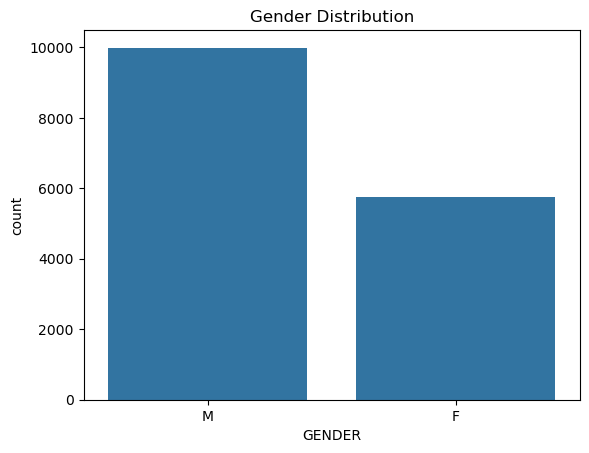

In [6]:
# Gender distribution
gender_counts = df['GENDER'].value_counts()
print(gender_counts)
sns.countplot(data=df, x='GENDER')
plt.title("Gender Distribution")
plt.show()

age_group
0-17       73
18-29     319
30-44    1449
45-59    5300
60-74    6535
75-89    2021
90+        60
Name: count, dtype: int64


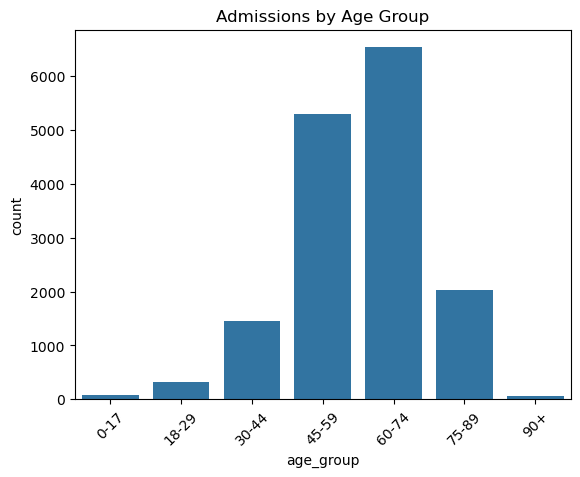

In [8]:
# Age group distribution
bins = [0, 18, 30, 45, 60, 75, 90, 120]
labels = ['0-17', '18-29', '30-44', '45-59', '60-74', '75-89', '90+']
df['age_group'] = pd.cut(df['AGE'], bins=bins, labels=labels)
age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)
sns.countplot(data=df, x='age_group', order=labels)
plt.title("Admissions by Age Group")
plt.xticks(rotation=45)
plt.show()

TYPE OF ADMISSION-EMERGENCY/OPD
E    10924
O     4833
Name: count, dtype: int64


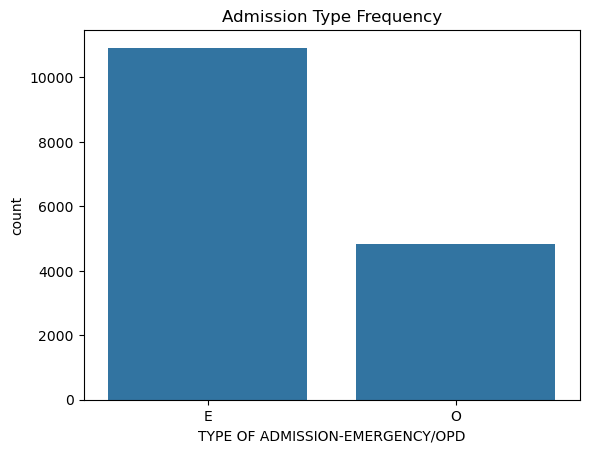

In [9]:
# Admission types
admission_type_counts = df['TYPE OF ADMISSION-EMERGENCY/OPD'].value_counts()
print(admission_type_counts)
sns.countplot(data=df, x='TYPE OF ADMISSION-EMERGENCY/OPD')
plt.title("Admission Type Frequency")
plt.show()

Admissions per Day of the Week:

admission_day
Monday       1984
Tuesday      1861
Thursday     1739
Friday       1739
Wednesday    1717
Saturday     1651
Sunday       1299
Name: count, dtype: int64

📌 Most admissions happen on: Monday (1984 patients)


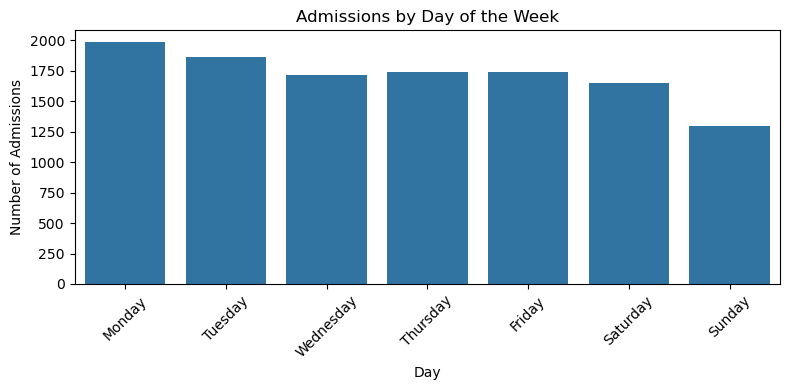

In [18]:
# Admission day
df['D.O.A'] = pd.to_datetime(df['D.O.A'], dayfirst=True, errors='coerce')

df['admission_day'] = df['D.O.A'].dt.day_name()

admission_day_counts = df['admission_day'].value_counts()

busiest_day = admission_day_counts.idxmax()
admissions_on_busiest = admission_day_counts.max()

print("Admissions per Day of the Week:\n")
print(admission_day_counts)
print(f"\n📌 Most admissions happen on: {busiest_day} ({admissions_on_busiest} patients)")

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='admission_day', order=ordered_days)
plt.title("Admissions by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TYPE OF ADMISSION-EMERGENCY/OPD          E          O
GENDER                                               
F                                70.313855  29.686145
M                                68.758759  31.241241


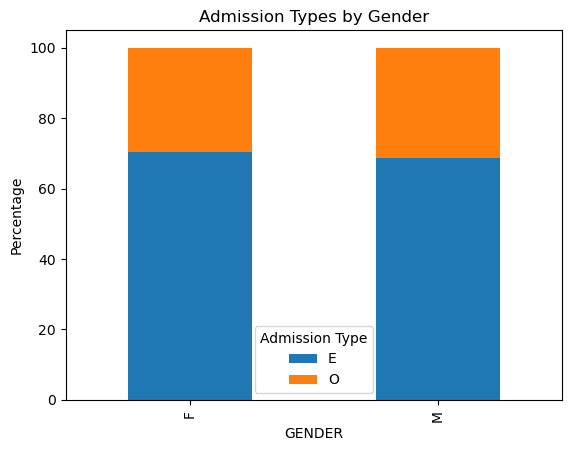

In [22]:
# Admission types across genders
admission_by_gender = pd.crosstab(df['GENDER'], df['TYPE OF ADMISSION-EMERGENCY/OPD'], normalize='index') * 100
print(admission_by_gender)
admission_by_gender.plot(kind='bar', stacked=True)
plt.title("Admission Types by Gender")
plt.ylabel("Percentage")
plt.legend(title="Admission Type")
plt.show()

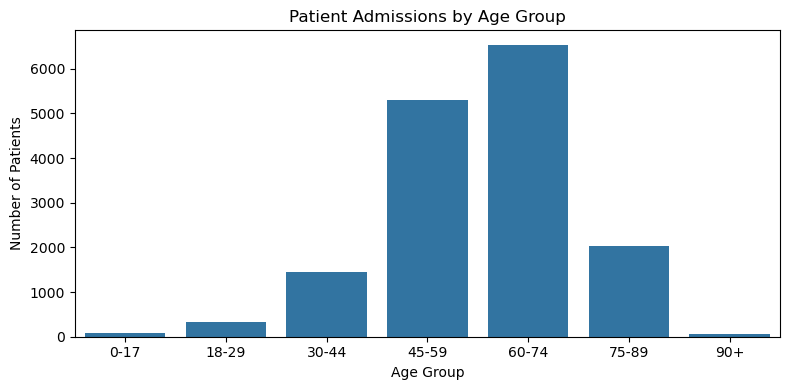

In [23]:
# Visualizations : 1

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age_group', order=['0-17', '18-29', '30-44', '45-59', '60-74', '75-89', '90+'])
plt.title("Patient Admissions by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

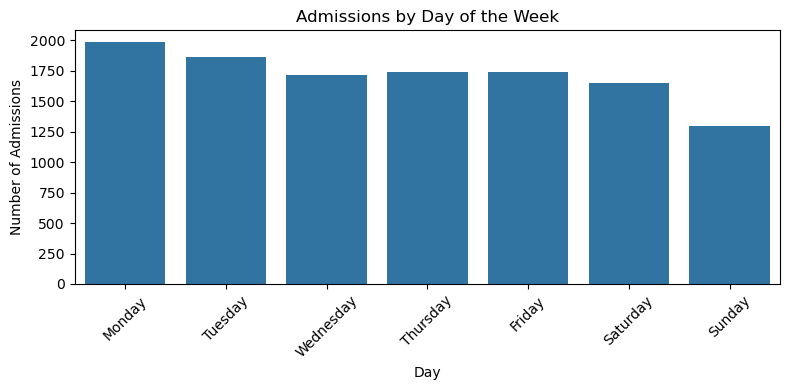

In [24]:
# Visualizations : 2

plt.figure(figsize=(8, 4))
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='admission_day', order=ordered_days)
plt.title("Admissions by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

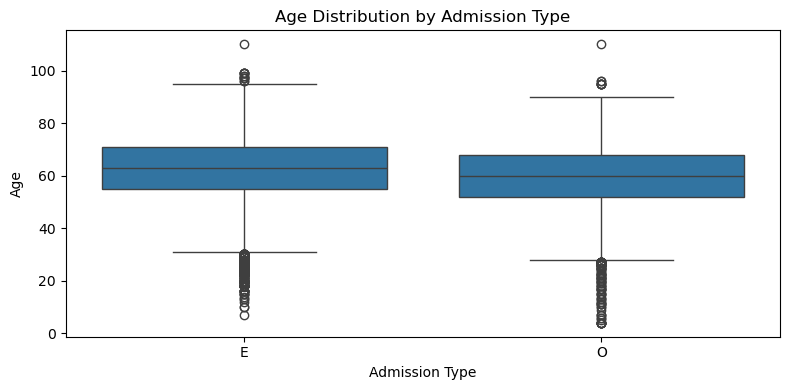

In [25]:
# Visualizations : 3

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='TYPE OF ADMISSION-EMERGENCY/OPD', y='AGE')
plt.title("Age Distribution by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Age")
plt.tight_layout()
plt.show()